<a href="https://colab.research.google.com/github/DhayuIntan/2141720026_PCVK_2023/blob/main/week-11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Mounted at /content/drive


### 2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_template.jpg sebagai templatenya.

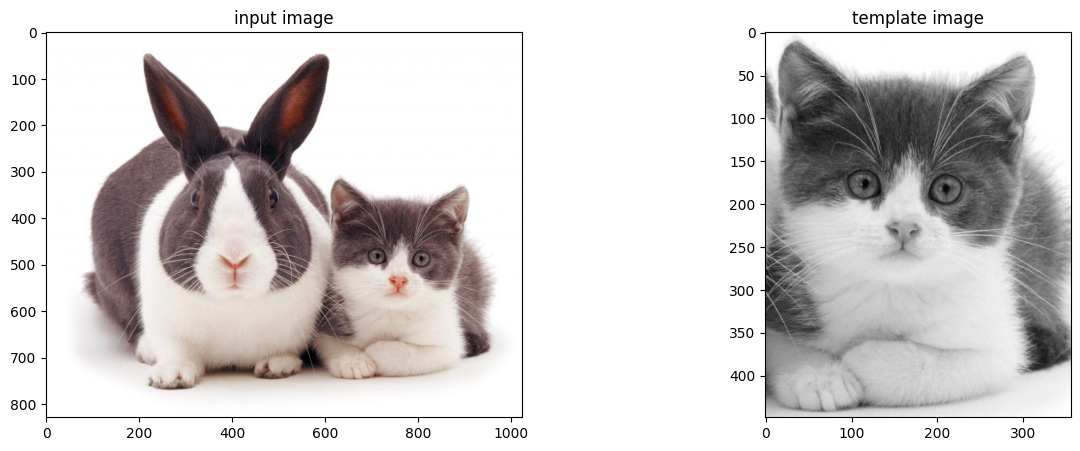

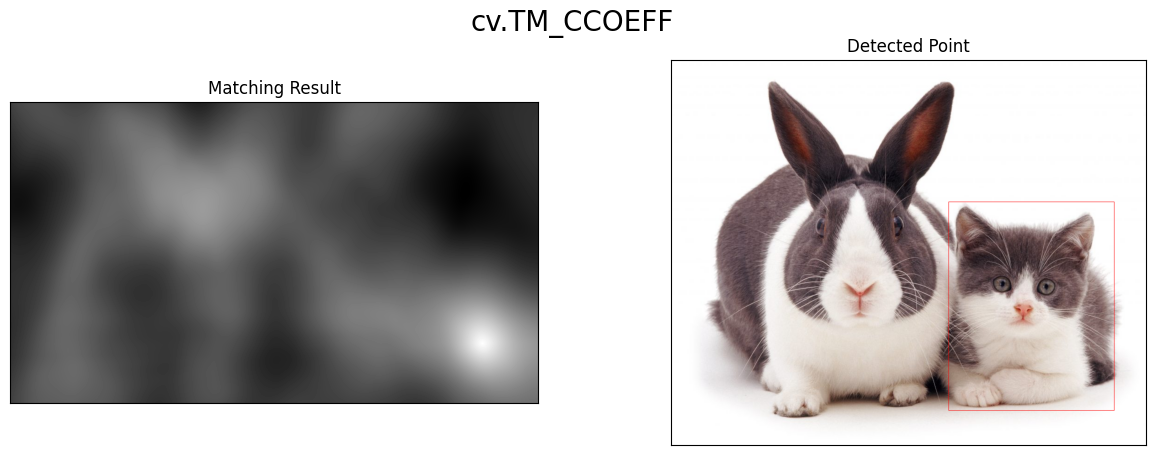

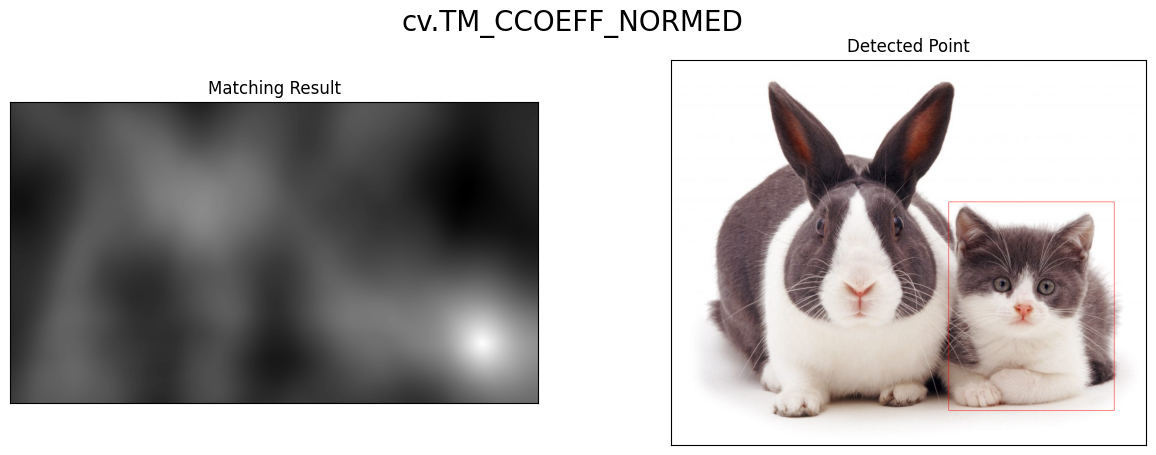

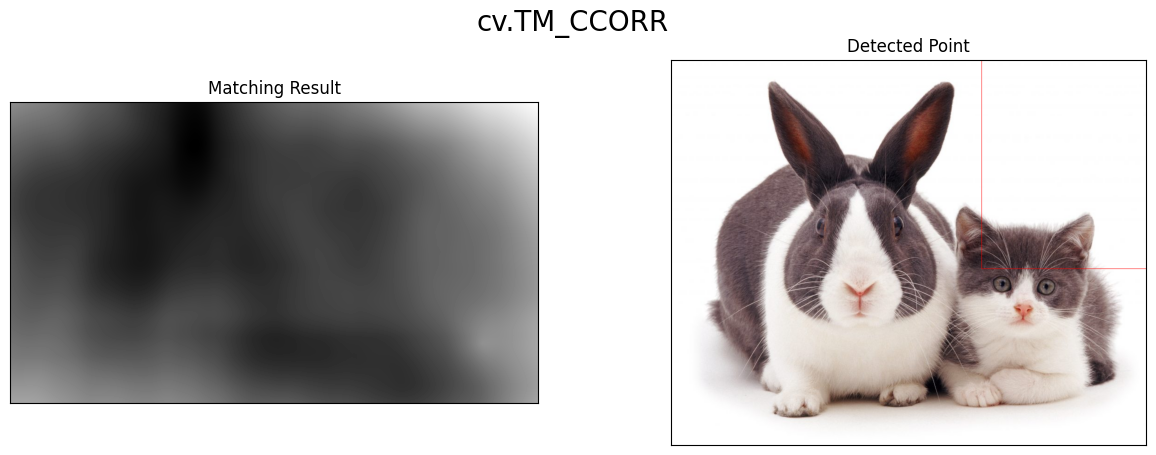

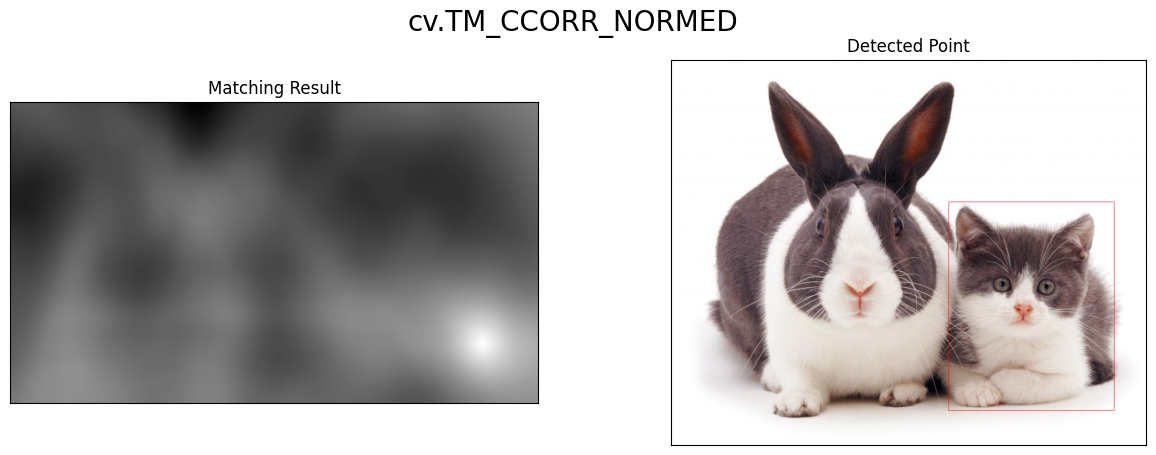

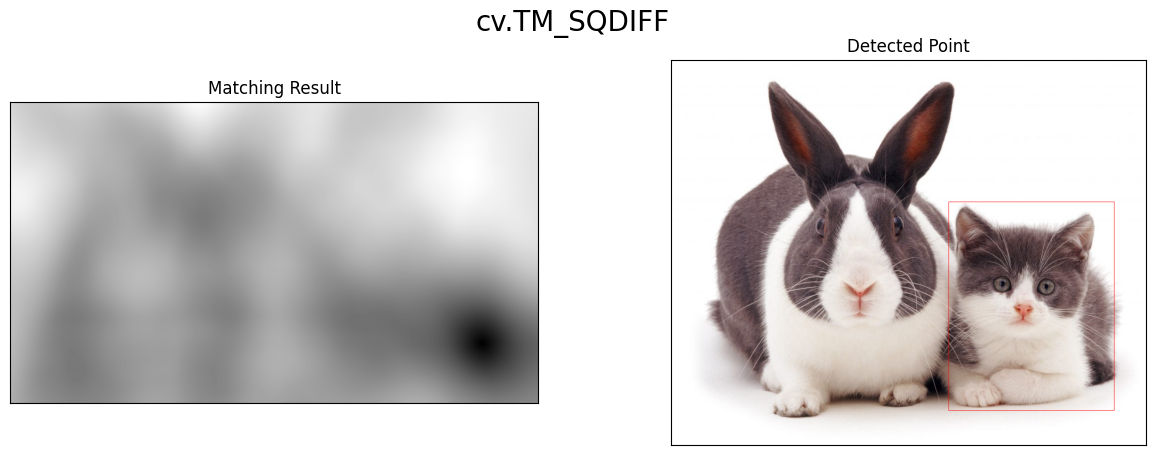

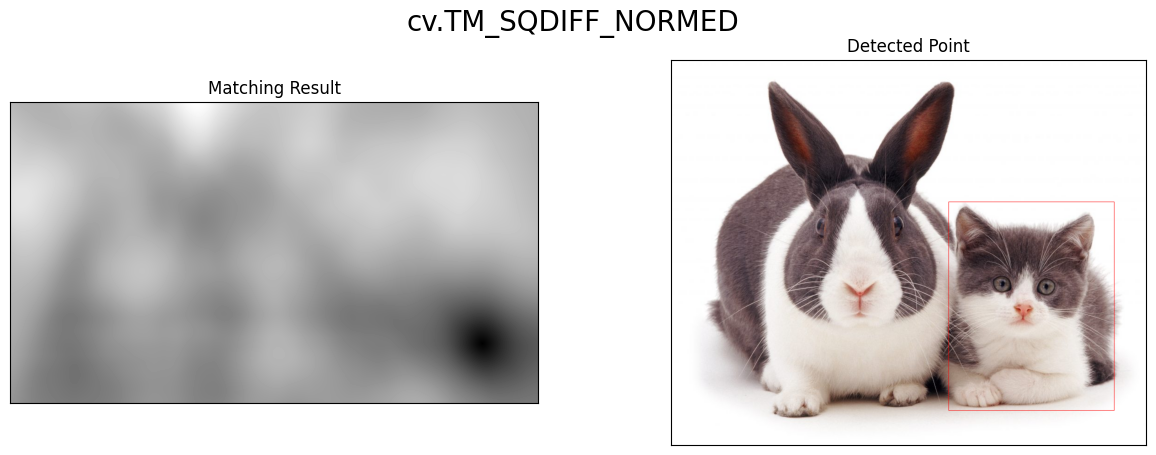

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load gambar input
image = cv.imread('/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg')  # Baca gambar input
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Konversi ke citra keabuan
image2 = image.copy()  # Salin gambar input untuk penggunaan nanti

# Load gambar template
template = cv.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg', 0)  # Baca gambar template
w, h = template.shape[::-1]  # Dapatkan dimensi template

# Tampilkan gambar input dan template
f, axarr = plt.subplots(1, 2, figsize=(15, 5))  # Buat 2 plot untuk gambar input dan template
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")  # Tampilkan gambar input
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")  # Tampilkan gambar template

# Daftar metode yang akan digunakan
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Loop melalui setiap metode dan lakukan pencocokan template
for meth in methods:
    image = image2.copy()  # Salin gambar input untuk setiap iterasi
    method = eval(meth)  # Ambil metode yang akan digunakan

    # Terapkan metode pencocokan template
    res = cv.matchTemplate(image_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Tentukan titik sudut kiri atas dan kanan bawah untuk kotak hasil pencocokan
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak di sekitar area yang cocok pada gambar input
    cv.rectangle(image, top_left, bottom_right, (0, 0, 255))

    # Tampilkan hasil pencocokan template dan gambar input yang telah dimodifikasi
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])  # Tampilkan hasil pencocokan template
    plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])  # Tampilkan gambar input dengan area yang cocok
    plt.suptitle(meth, fontsize=20)  # Judul plot dengan metode yang digunakan
    plt.show()  # Tampilkan plot


### 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

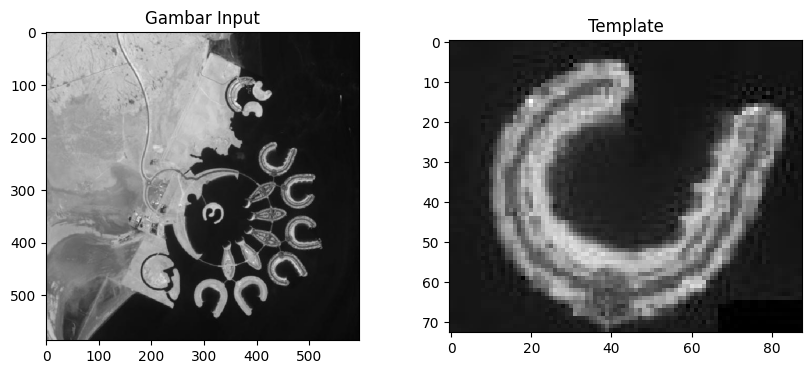

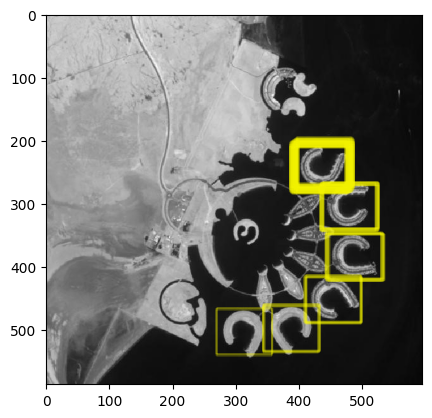

In [7]:
from skimage.feature import match_template

# Memuat gambar utama dan template
main_image = cv.imread('/content/drive/MyDrive/Images/Object Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/Images/Object Detection/bahrain-template.jpg', 0)

# Menampilkan gambar input dan template dalam dua plot terpisah
f, axarr = plt.subplots(1, 2, figsize=(10, 4))
axarr[0].imshow(main_image, cmap='gray'), axarr[0].set_title("Gambar Input")
axarr[1].imshow(template, cmap='gray'), axarr[1].set_title("Template")

# Menghitung kemiripan citra dengan citra template menggunakan library skimage
result = match_template(main_image, template)

# Menentukan threshold untuk hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil pencocokan
fig, ax = plt.subplots()
ax.imshow(main_image, cmap=plt.cm.gray)

# Menampilkan kotak di sekitar area yang cocok
height, width = template.shape
for loc in zip(*locations[::-1]):  # Iterasi setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()


### 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg.

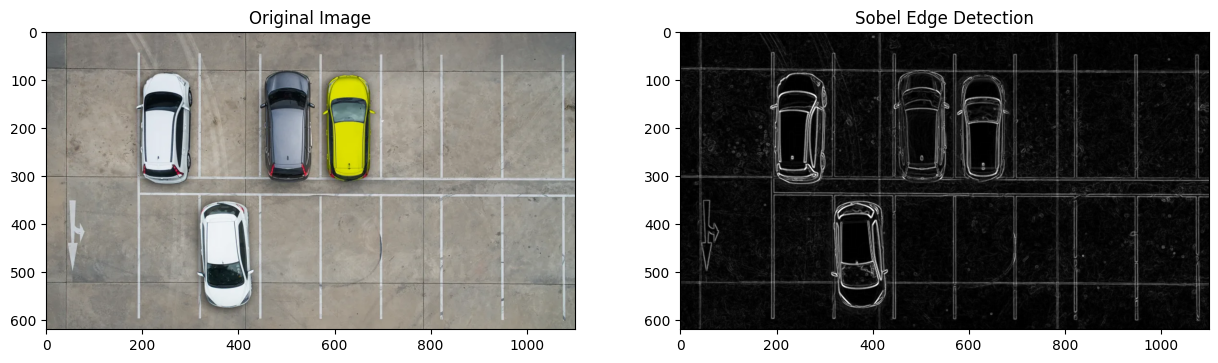

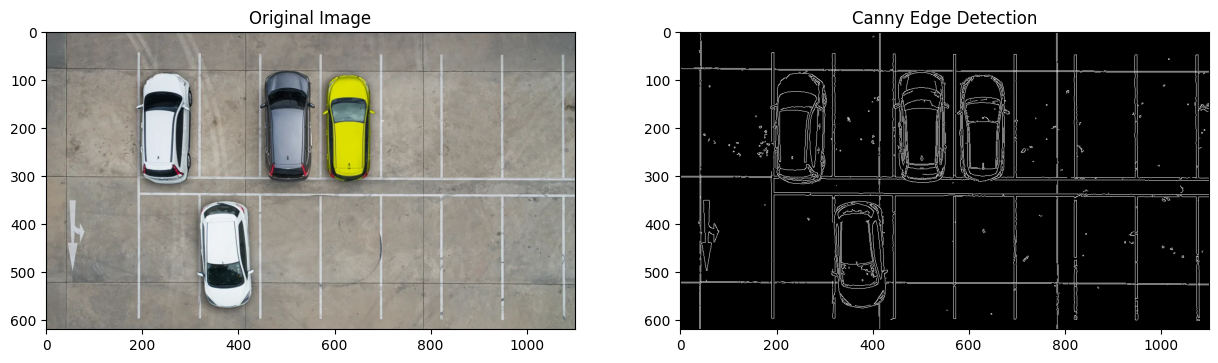

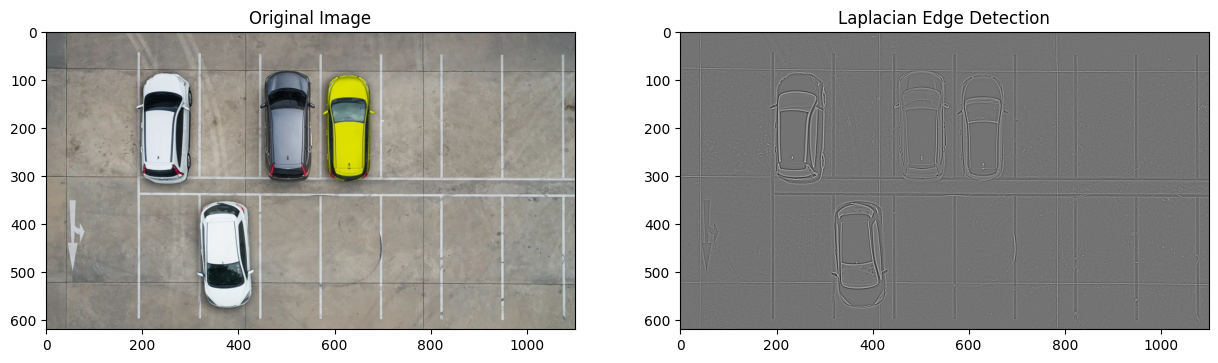

In [10]:
# Memuat gambar
input_image = cv.imread('/content/drive/MyDrive/Images/Object Detection/car-park.jpg')

# Konversi ke grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

# Menghilangkan noise dengan Gaussian Blur
blurred_image = cv.GaussianBlur(gray_image, (3, 3), 0)

# Sobel filtering horizontal dan vertikal
sobel_x = cv.Sobel(blurred_image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(blurred_image, cv.CV_64F, 0, 1, ksize=3)

# Kombinasi dari filtering Sobel horizontal dan vertikal
sobel_combined = cv.addWeighted(cv.convertScaleAbs(sobel_x), 0.5, cv.convertScaleAbs(sobel_y), 0.5, 0)

# Plot hasil Sobel Edge Detection
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()

# Canny Edge Detection
canny_edges = cv.Canny(input_image, 100, 200)

# Plot hasil Canny Edge Detection
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

# Deteksi tepi menggunakan Laplacian
laplacian = cv.Laplacian(blurred_image, cv.CV_64F)

# Plot hasil Laplacian Edge Detection
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()


### 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg

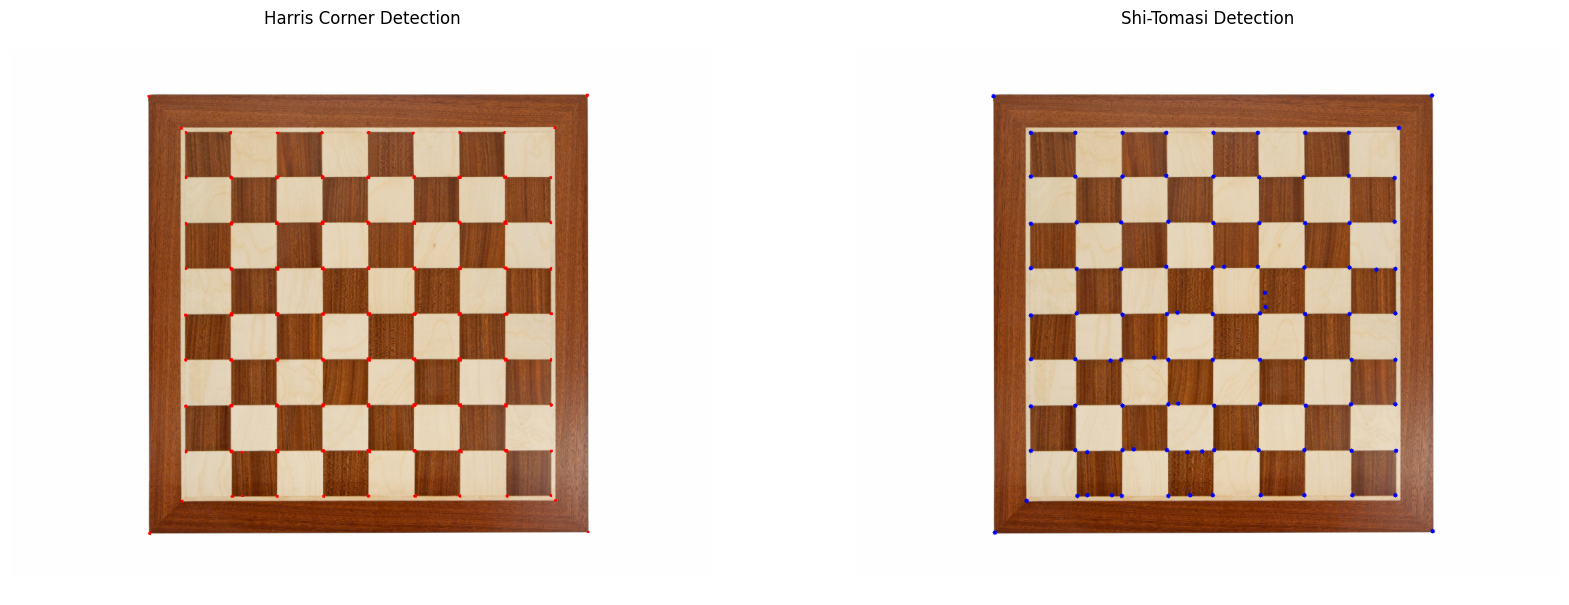

In [15]:
# Load citra input
input_img = cv.imread('/content/drive/MyDrive/Images/Object Detection/chess-board.jpg')

# Deteksi dengan metode Harris Corner
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
harris_output = cv.cornerHarris(np.float32(gray_img), 2, 3, 0.04)
harris_output = cv.dilate(harris_output, None)
harris_corners = input_img.copy()
harris_corners[harris_output > 0.01 * harris_output.max()] = [0, 0, 255]

# Deteksi dengan metode Shi-Tomasi
corners = cv.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
corners = np.int0(corners)
shi_corners = input_img.copy()
for corner in corners:
    x, y = corner.ravel()
    cv.circle(shi_corners, (x, y), 3, (255, 0, 0), -1)

# Menampilkan hasil Harris Corner Detection
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(cv.cvtColor(harris_corners, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# Menampilkan hasil Shi-Tomasi Detection
plt.subplot(122)
plt.imshow(cv.cvtColor(shi_corners, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')

plt.show()


### 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

Jumlah garis Hough: 33
Jumlah garis setelah penyaringan: 20


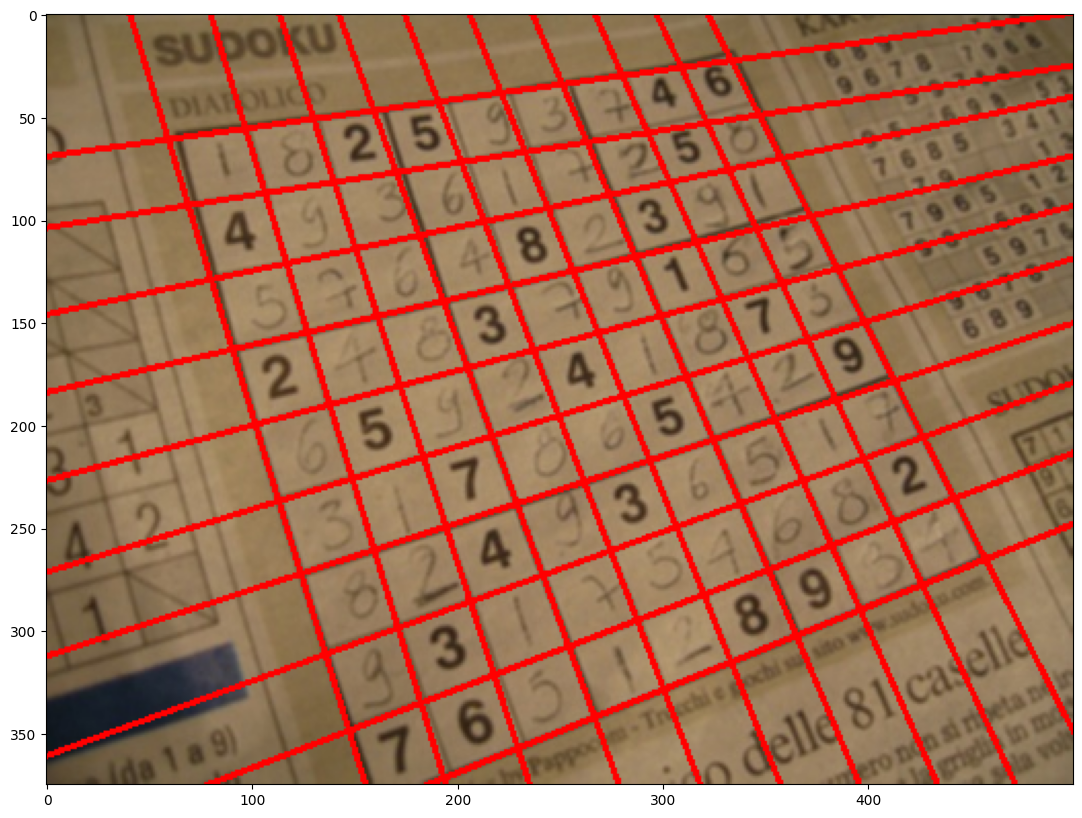

In [17]:
# Membaca gambar
source_img = cv.imread('/content/drive/MyDrive/Images/Object Detection/sudoku.jpg')

# Konversi ke citra keabuan
gray_img = cv.cvtColor(source_img, cv.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv.Canny(gray_img, 90, 150, apertureSize=3)

# Proses dilasi pada tepi
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Proses erosi pada tepi
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Transformasi Hough untuk deteksi garis
detected_lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if not detected_lines.any():
    print('Tidak ditemukan garis')
    exit()

# Filter dan penyaringan garis
rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(detected_lines))}
for i in range(len(detected_lines)):
    for j in range(len(detected_lines)):
        if i == j:
            continue
        rho_i, theta_i = detected_lines[i][0]
        rho_j, theta_j = detected_lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(detected_lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(detected_lines) * [True]
for i in range(len(detected_lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(detected_lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = detected_lines[indices[i]][0]
        rho_j, theta_j = detected_lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False
print('Jumlah garis Hough:', len(detected_lines))

filtered_lines = []

for i in range(len(detected_lines)):
    if line_flags[i]:
        filtered_lines.append(detected_lines[i])

print('Jumlah garis setelah penyaringan:', len(filtered_lines))

# Menandai garis yang terdeteksi pada gambar asli
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(source_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Menampilkan hasil
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(source_img, cv.COLOR_BGR2RGB))
plt.show()

### 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

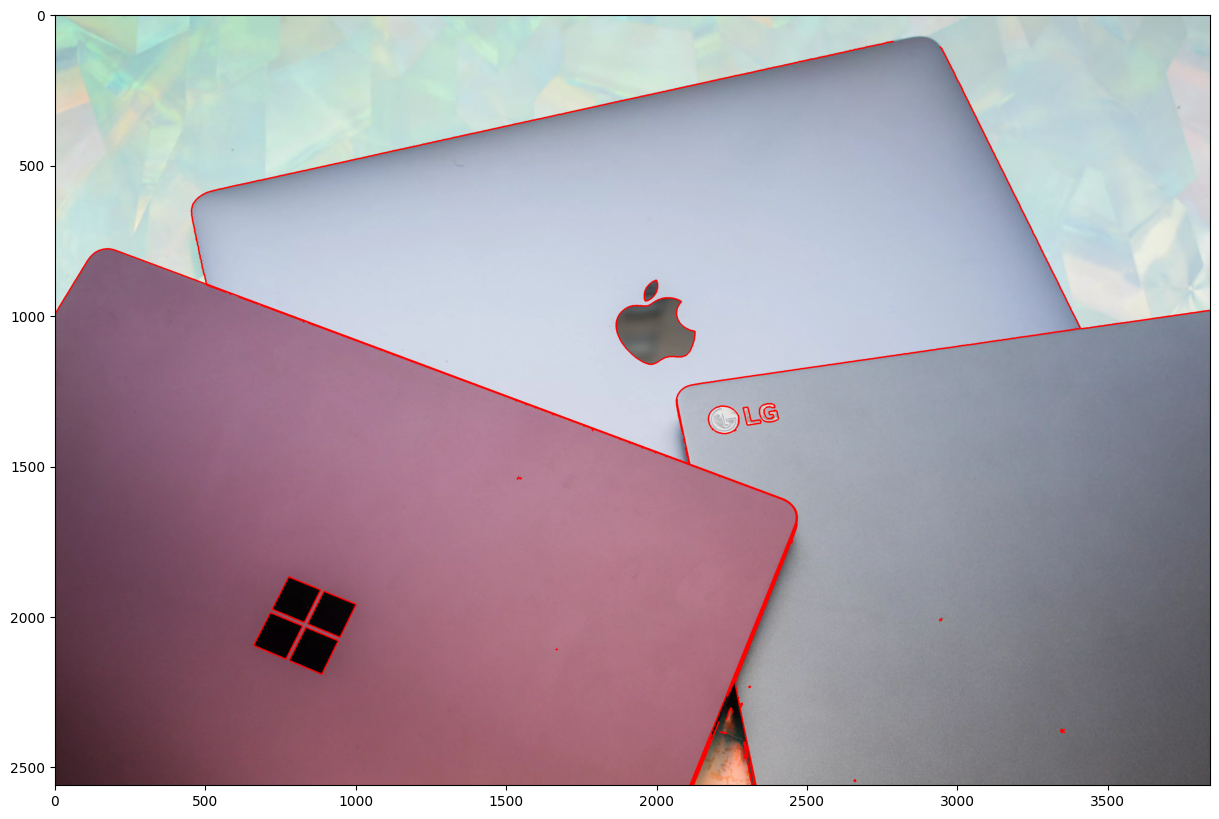

In [19]:
import cv2 as cv
from matplotlib import pyplot as plt

# Membaca gambar
source_img = cv.imread('/content/drive/MyDrive/Images/Object Detection/laptop.jpg')

# Konversi ke citra keabuan
gray_img = cv.cvtColor(source_img, cv.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv.Canny(gray_img, 30, 200)

# Mendapatkan kontur dengan findContours
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Gambar kontur pada gambar asli
cv.drawContours(source_img, contours, -1, (0, 0, 255), 3)

# Menampilkan gambar dengan kontur yang terdeteksi
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(source_img, cv.COLOR_BGR2RGB))
plt.show()

# Pengayaan Materi KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

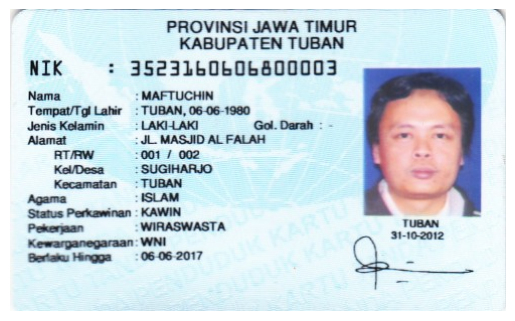

In [20]:
img = cv.imread('/content/drive/MyDrive/Images/KTP_More/ktp3.png')

plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Muat dua library berikut sebagai tahapan persiapan

In [21]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [23]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/Images/KTP_More"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
  src = cv2.imread(os.path.join(path_plate, name_file))
  blurred = src.copy()
  gray = blurred.copy()

In [35]:
# Direktori tempat gambar KTP dipotong
path_plate = "/content/drive/MyDrive/Images/KTP_More"

# List untuk menyimpan nama file dalam direktori
file_names = []

# Melakukan iterasi pada file-file dalam direktori
for name_file in sorted(os.listdir(path_plate)):
    # Mendapatkan path lengkap untuk setiap file
    file_path = os.path.join(path_plate, name_file)

    # Membaca gambar dari setiap file
    src = cv2.imread(file_path)

    # Proses lain
    blurred = src.copy()
    gray = blurred.copy()

    # Menyimpan nama file ke dalam list
    file_names.append(name_file)

# Menampilkan daftar nama file
for file_name in file_names:
    print("Nama file: ", file_name)

Nama file:  KTP7.jpeg
Nama file:  ktp.png
Nama file:  ktp1.png
Nama file:  ktp2.png
Nama file:  ktp3.png
Nama file:  ktp4.png
Nama file:  ktp5.png
Nama file:  ktp6.png


5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

168.0 (300, 493)


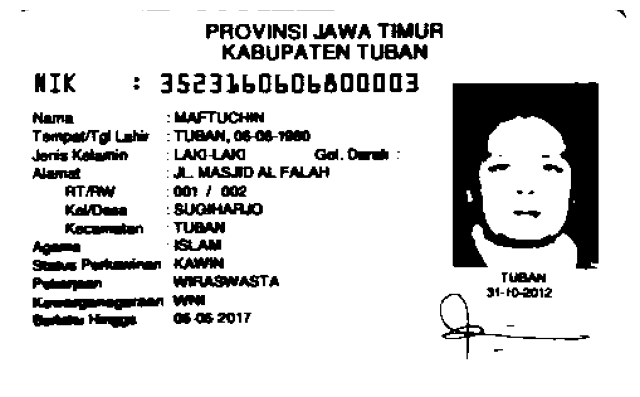

In [37]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
# Menampilkan citra setelah thresholding
plt.figure(figsize=(8, 6))
plt.imshow(bw, cmap='gray')
plt.axis('off')
plt.show()

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

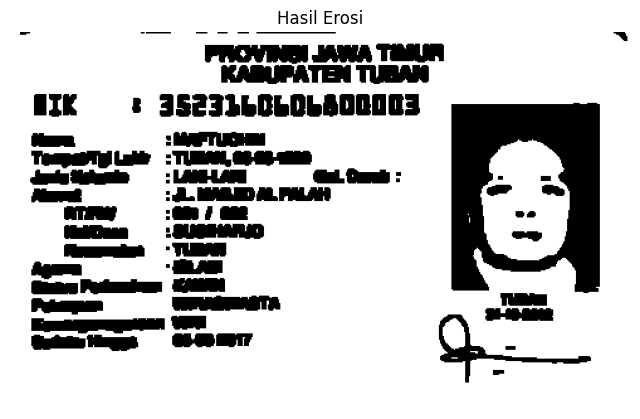

In [41]:
# Erosi
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(bw, kernel, iterations=1)

# Menampilkan hasil erosi
plt.figure(figsize=(8, 6))
plt.imshow(erosion, cmap='gray')
plt.title('Hasil Erosi')
plt.axis('off')
plt.show()

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).

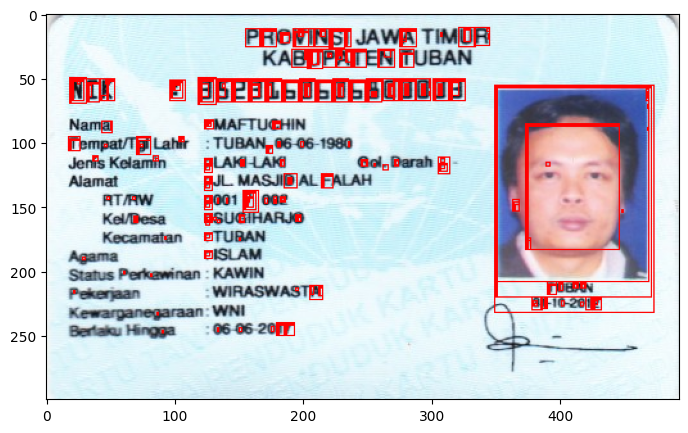

In [46]:
# Proses Smoothing dengan Gaussian Blur
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

# Konversi ke Citra Grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Thresholding Menggunakan Metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi pada Citra Biner
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi Kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping Kontur untuk Seleksi dan Penggambaran Kotak Pembatas
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')

    # Seleksi Kontur berdasarkan Ukuran dan Rasio
    if h >= 4 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan Hasil dengan Kotak Pembatas pada Kontur yang Dipilih
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# F. Tugas Praktikum
Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:
*   Kelompok 1 – KTP Riyanto Sleman
*   Kelompok 2 – KTP Galang Raka Bengkulu
*   Kelompok 3 – KTP Arief Wijaya Cimahi
*   Kelompok 4 – KTP Edo Nias
*   Kelompok 5 – KTP Widiarso Bekasi
*   Kelompok 6 – KTP Abdurrauf Soppeng



Kelompok 6 - KTP Abdurrauf Soppeng

**Anggota Kelompok:**

- 2141720007 [Wildan Hafidz Mauludin](https://github.com/nikoshaa)
- 2141720026 [Dhayu Intan Nareswari](https://github.com/DhayuIntan)
- 2141720125 [Farhan Dwi Pramana](https://github.com/FarhanDwiPramana)
- 2141720173 [Mochammad Zaky Zamroni](https://github.com/zakyzuf)
- 2141720117 [Ziedny Bisma Mubarok](https://github.com/Ziedny28)

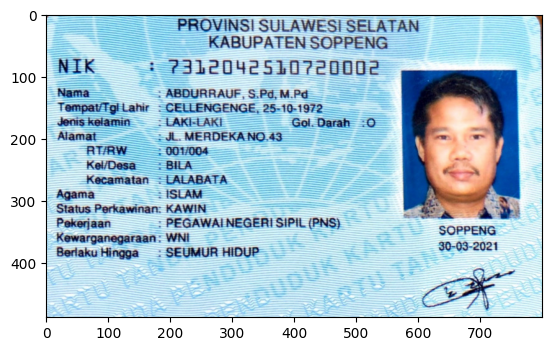

In [51]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP7.jpeg')
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

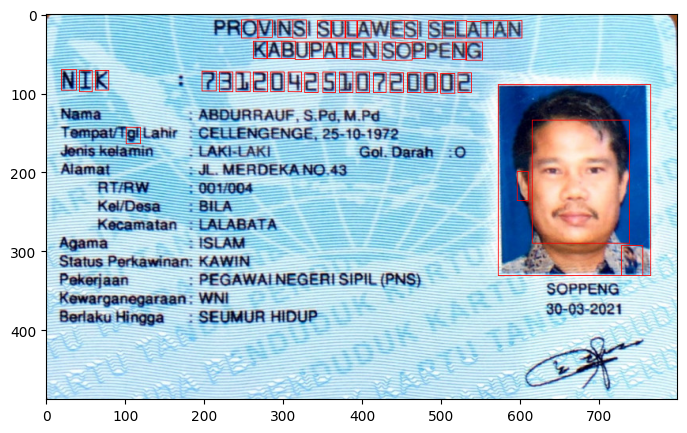

In [52]:
blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))